## US Accidents Dataset Analysis
### Dataset Columns:

Severity: Severity of the accident.

StartTime: Time when the accident started.

EndTime: Time when the accident ended.

StartLat: Latitude of the accident location.

StartLng: Longitude of the accident location.

Distance: Distance affected by the accident.

Street: Street where the accident occurred.

City: City where the accident occurred.

State: State where the accident occurred.

Zipcode: Zipcode of the accident location.

Crossing, GiveWay, Junction, NoExit, Railway, Roundabout, Station, Stop, TrafficCalming, TrafficSignal: Boolean indicators for presence of these features related to the accident.
### Code Description:
This code performs exploratory data analysis (EDA) and visualization on the accidents dataset:

### Data Loading and Preparation:
Loads the dataset ('accidents.csv') and selects relevant columns.
Drops rows with missing values in relevant columns.
Converts StartTime and EndTime columns to datetime format.
### Exploratory Data Analysis (EDA):
Visualizes the distribution of accident severity using a count plot.
Displays the top 20 cities with the highest accident counts using a horizontal bar plot.
### Visualization of Accident Hotspots:
Creates a map using Folium to visualize accident hotspots based on latitude and longitude.
### Statistical Analysis:
Conducts a chi-square test to analyze the relationship between accident severity and the presence of traffic signals. 

This analysis provides insights into accident severity, geographic distribution of accidents, hotspot visualization, and statistical relationships within the dataset.

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('accidents.csv')

# Display the first few rows and check columns
display(df.head())
display(df.columns)


,Severity,StartTime,EndTime,StartLat,StartLng,Distance,Street,City,State,Zipcode,...,Crossing,GiveWay,Junction,NoExit,Railway,Roundabout,Station,Stop,TrafficCalming,TrafficSignal
0,2,2019-07-22 14:43:06,2019-07-22 16:22:19,34.789009,-82.483383,0.000,Highway 153,Greenville,SC,29611,...,False,False,False,False,False,False,False,False,False,False
1,2,2019-03-20 16:12:14,2019-03-20 16:41:05,40.998264,-76.650396,0.472,Continental Blvd,Danville,PA,17821,...,False,False,False,False,False,False,False,False,False,False
2,3,2018-12-12 14:19:18,2018-12-12 14:48:56,33.461292,-112.082001,0.000,I-10 W,Phoenix,AZ,85003,...,False,False,False,False,False,False,False,False,False,False
3,2,2018-03-09 08:02:11,2018-03-09 08:49:15,42.288445,-87.924911,0.000,Oak Spring Rd,Libertyville,IL,60048,...,False,False,False,False,False,False,False,False,False,False
4,2,2020-03-27 05:36:56,2020-03-27 06:36:48,36.229259,-86.594650,0.000,Saundersville Rd,Old Hickory,TN,37138,...,False,False,False,False,False,False,False,False,False,False


Index(['Severity', 'StartTime', 'EndTime', 'StartLat', 'StartLng', 'Distance',
       'Street', 'City', 'State', 'Zipcode', 'Temperature', 'Humidity',
       'Pressure', 'Visibility', 'WindSpeed', 'Precipitation',
       'WeatherCondition', 'Amenity', 'Bump', 'Crossing', 'GiveWay',
       'Junction', 'NoExit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'TrafficCalming', 'TrafficSignal'],
      dtype='object')

In [2]:
# Select relevant columns
relevant_columns = ['Severity', 'StartTime', 'EndTime', 'StartLat', 'StartLng', 'Distance', 
                    'Street', 'City', 'State', 'Zipcode', 'Crossing', 'GiveWay', 'Junction', 
                    'NoExit', 'Railway', 'Roundabout', 'Station', 'Stop', 'TrafficCalming', 'TrafficSignal']

# Drop rows with missing values in relevant columns
df_clean = df[relevant_columns].dropna()

# Convert StartTime and EndTime to datetime format
df_clean['StartTime'] = pd.to_datetime(df_clean['StartTime'])
df_clean['EndTime'] = pd.to_datetime(df_clean['EndTime'])


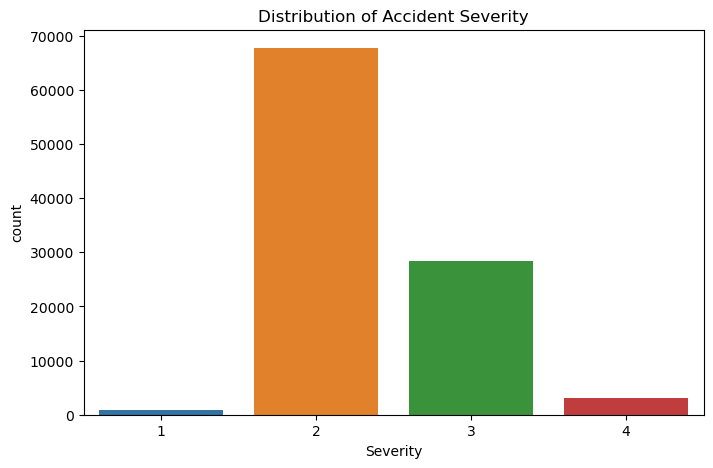

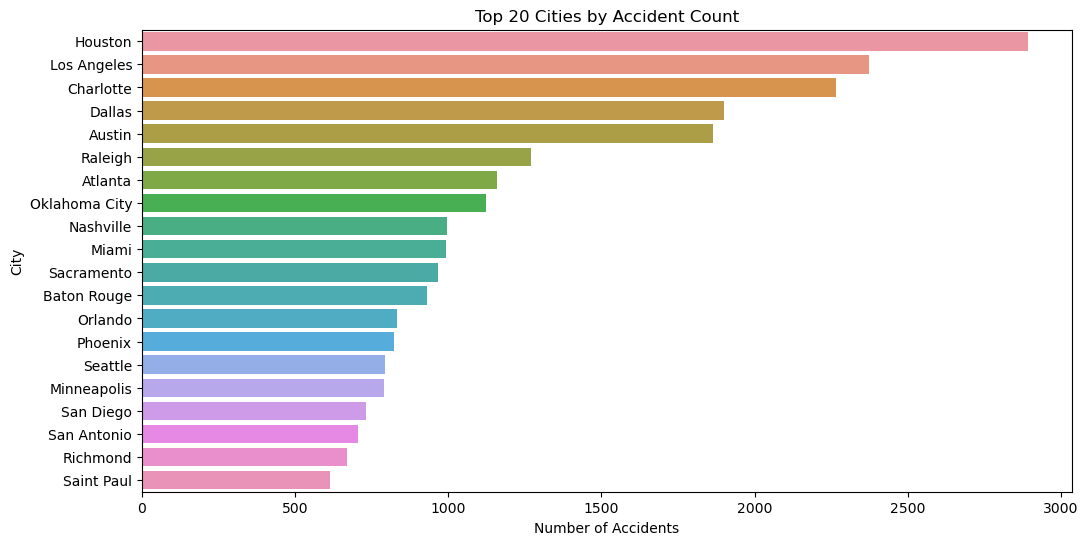

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Explore Severity of accidents
plt.figure(figsize=(8, 5))
sns.countplot(x='Severity', data=df_clean)
plt.title('Distribution of Accident Severity')
plt.show()

# Example: Explore accidents by City
plt.figure(figsize=(12, 6))
sns.countplot(y='City', data=df_clean, order=df_clean['City'].value_counts().index[:20])
plt.title('Top 20 Cities by Accident Count')
plt.xlabel('Number of Accidents')
plt.ylabel('City')
plt.show()


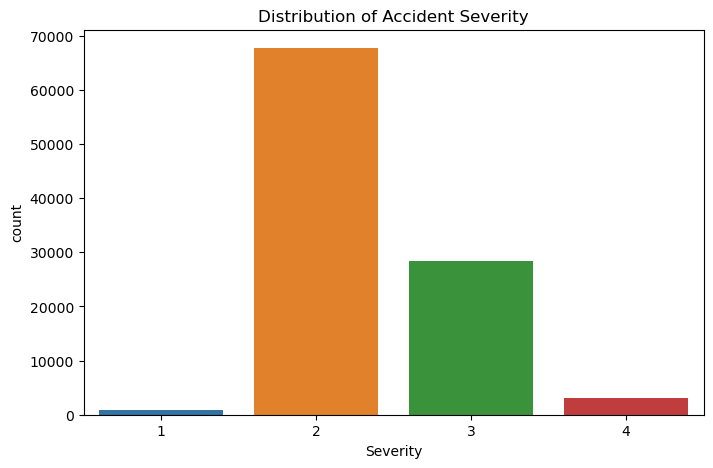

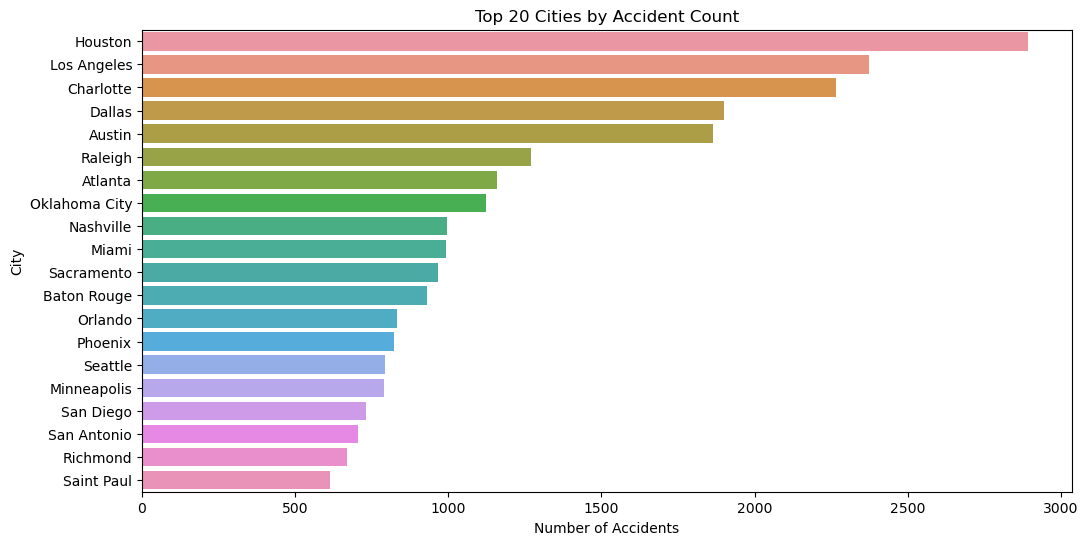

TrafficSignal,False,True
Severity,,
1,459,361
2,52213,15495
3,26659,1638
4,2832,343


Chi-square statistic: 4471.04869250832
P-value: 0.0


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from scipy.stats import chi2_contingency

# Step 1: Load and Understand the Data
df = pd.read_csv('accidents.csv')

# Step 2: Data Cleaning and Preparation
relevant_columns = ['Severity', 'StartTime', 'EndTime', 'StartLat', 'StartLng', 'Distance',
                    'Street', 'City', 'State', 'Zipcode', 'Crossing', 'GiveWay', 'Junction',
                    'NoExit', 'Railway', 'Roundabout', 'Station', 'Stop', 'TrafficCalming', 'TrafficSignal']

df_clean = df[relevant_columns].dropna()
df_clean['StartTime'] = pd.to_datetime(df_clean['StartTime'])
df_clean['EndTime'] = pd.to_datetime(df_clean['EndTime'])

# Step 3: Exploratory Data Analysis (EDA)
plt.figure(figsize=(8, 5))
sns.countplot(x='Severity', data=df_clean)
plt.title('Distribution of Accident Severity')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(y='City', data=df_clean, order=df_clean['City'].value_counts().index[:20])
plt.title('Top 20 Cities by Accident Count')
plt.xlabel('Number of Accidents')
plt.ylabel('City')
plt.show()

# Step 4: Visualization of Accident Hotspots
accident_map = folium.Map(location=[df_clean['StartLat'].mean(), df_clean['StartLng'].mean()], zoom_start=5)

for _, row in df_clean.sample(1000).iterrows():
    folium.Marker([row['StartLat'], row['StartLng']]).add_to(accident_map)

display(accident_map)

# Step 5: Statistical Analysis and Insights
severity_traffic_signal = pd.crosstab(df_clean['Severity'], df_clean['TrafficSignal'])
display(severity_traffic_signal)

chi2, p, dof, expected = chi2_contingency(severity_traffic_signal)
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

